## Feature Scaling

The scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Standardisation**.

=================================================================

## Standardisation


Standardisation involves centering the variable at zero, and standardising the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

**z = (x - x_mean) /  std**

The result of the above transformation is **z**, which is called the z-score, and represents how many standard deviations a given observation deviates from the mean. A z-score specifies the location of the observation within a distribution (in numbers of standard deviations respect to the mean of the distribution). The sign of the z-score (+ or - ) indicates whether the observation is above (+) or below ( - ) the mean.

The shape of a standardised (or z-scored normalised) distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardised distribution will be normal. But, if the original distribution is skewed, then the standardised distribution of the variable will also be skewed. In other words, **standardising a variable does not normalize the distribution of the data** and if this is the desired outcome, we should implement any of the variable transformation techniques.

In a nutshell, standardisation:

- centers the mean at 0
- scales the variance at 1
- preserves the shape of the original distribution
- the minimum and maximum values of the different variables may vary
- preserves outliers

Good for algorithms that require features centered at zero.

## In this demo

We will perform standardisation using the Boston House Prices data set that comes with Scikit-learn

In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

from sklearn.preprocessing import StandardScaler

In [7]:
# load dataset
boston = load_boston()
boston

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
# convert it into a DataFrame
data = pd.DataFrame(boston.data, columns=boston.feature_names)

data['MEDV'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# describe 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. Note for this demo, how **the mean values are not centered at zero, and the standard deviations are not scaled to 1**.

When standardising the data set, we need to first identify the mean and standard deviation of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [13]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis = 1),
                                                   data['MEDV'],
                                                   test_size=0.3,
                                                   random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

### Standardisation

The StandardScaler from scikit-learn removes the mean and scales the data to unit variance. Plus, it learns and stores the parameters needed for scaling. Thus, it is top choice for this feature scaling technique.

On the downside, you can't select which variables to scale directly, it will scale the entire data set, and it returns a NumPy array, without the variable values.

In [14]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

In [15]:
# fit using the training data
scaler.fit(X_train)

StandardScaler()

In [16]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
       5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
       9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
       1.24406497e+01])

In [18]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_

array([8.34141658e+00, 2.36196246e+01, 6.98393565e+00, 2.46476009e-01,
       1.15437239e-01, 7.01016354e-01, 2.79987983e+01, 2.06473886e+00,
       8.65974217e+00, 1.70351284e+02, 2.22166426e+00, 8.55009244e+01,
       7.06848020e+00])

In [20]:
# number of observations the scaler has seen -- basically the number of observations in the training set
scaler.n_samples_seen_

354

In [21]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [23]:
# let's have a look at the original training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.

np.round(X_train.describe(),1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,3.4,11.8,11.1,0.1,0.6,6.3,69.0,3.8,9.4,401.8,18.5,360.6,12.4
std,8.4,23.7,7.0,0.2,0.1,0.7,28.0,2.1,8.7,170.6,2.2,85.6,7.1
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.2,1.0,187.0,12.6,0.3,1.7
25%,0.1,0.0,5.0,0.0,0.4,5.9,45.2,2.1,4.0,276.0,17.4,376.1,6.7
50%,0.3,0.0,8.6,0.0,0.5,6.2,79.4,3.2,5.0,311.0,19.1,391.6,11.2
75%,3.1,20.0,18.1,0.0,0.6,6.6,93.8,5.1,24.0,666.0,20.2,395.7,16.7
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,37.0


In [27]:
# let's have a look at the scaled training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_scaled.describe(),1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.4,-0.5,-1.5,-0.3,-1.5,-3.9,-2.4,-1.3,-1.0,-1.3,-2.6,-4.2,-1.5
25%,-0.4,-0.5,-0.9,-0.3,-0.9,-0.6,-0.9,-0.8,-0.6,-0.7,-0.5,0.2,-0.8
50%,-0.4,-0.5,-0.4,-0.3,-0.2,-0.1,0.4,-0.3,-0.5,-0.5,0.3,0.4,-0.2
75%,-0.0,0.3,1.0,-0.3,0.6,0.5,0.9,0.6,1.7,1.6,0.8,0.4,0.6
max,10.3,3.7,2.4,3.8,2.7,3.5,1.1,4.1,1.7,1.8,1.6,0.4,3.5


As expected, the mean of each variable, which were not centered at zero, is now around zero and the standard deviation is set to 1. Note however, that the minimum and maximum values vary according to how spread the variable was to begin with and is highly influenced by the presence of outliers.

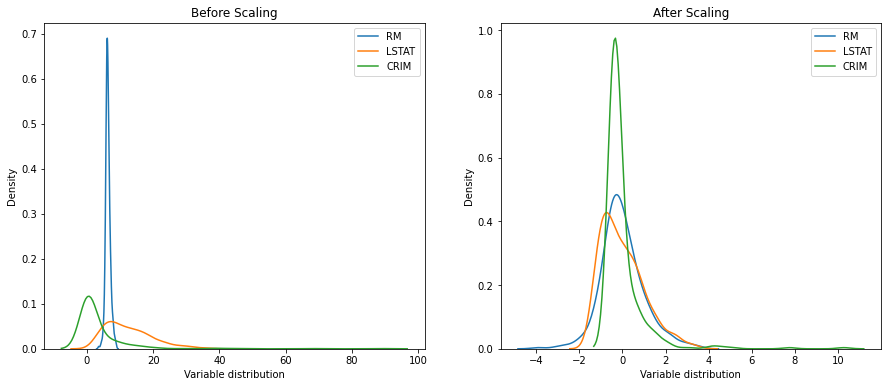

In [34]:
# lets check and compare the variable distribution before and after scaling

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.kdeplot(X_train['RM'], label='RM')
sns.kdeplot(X_train['LSTAT'],label='LSTAT')
sns.kdeplot(X_train['CRIM'],label='CRIM')
plt.xlabel('Variable distribution')
plt.legend(loc='best')
plt.title('Before Scaling')


plt.subplot(1,2,2)
sns.kdeplot(X_train_scaled['RM'],label='RM')
sns.kdeplot(X_train_scaled['LSTAT'],label='LSTAT')
sns.kdeplot(X_train_scaled['CRIM'],label='CRIM')
plt.xlabel('Variable distribution')
plt.legend(loc='best')
plt.title('After Scaling')

plt.show();

Note from the above plots how standardisation centered all the distributions at zero, but it preserved their original distribution. The value range is not identical, but it looks more homogeneous across the variables. 

Note something interesting in the following plot: 

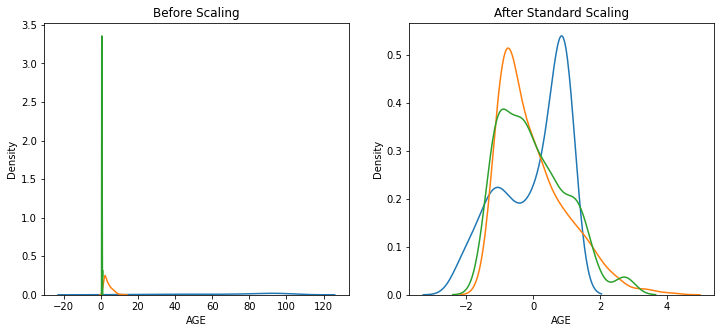

In [41]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

In [37]:
X_train['AGE'].min(), X_train['AGE'].max(), 

(2.9, 100.0)

In [38]:
X_train['NOX'].min(), X_train['NOX'].max(), 

(0.385, 0.871)

In the above plot, we can see how, by scaling, the variable NOX, which varied across a very narrow range of values [0-1], and AGE which varied across [0-100], now spread over a more homogeneous range of values, so that we can compare them directly in one plot, whereas before it was difficult. In a linear model, AGE would dominate the output, but after standardisation, both variables will be able to have an input (assuming that they are both predictive).  

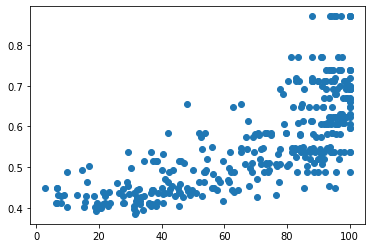

In [42]:
plt.scatter(X_train['AGE'], X_train['NOX'])

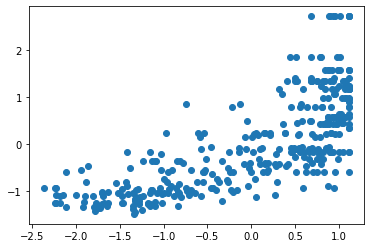

In [43]:
plt.scatter(X_train_scaled['AGE'], X_train_scaled['NOX'])

- We can see here in the scatter plot also, the distribution for these two variables are now more homogenous